# Analysis the effect of cutting speed on the surface roughness of objects from cylindrical grinding process using ANOVA method

Manufacturing is a dynamic sector. Improvements in both product and process must continue with the final objective always to gain customer satisfaction. The most common way of improving processes and products is by conducting experiments, the results of which are used as the basis for making improvements.

**ANOVA (Analysis  of Variance)** is one of the most frequently used experimental methods for various sectors, including the manufacturing sector. ANOVA can be used to analyze the effect of process parameters on the product of the process, one of them is in the grinding process.

In this case, we will analyze one of the grinding process parameters, which is the cutting speed, if it affects the surface roughness of the material.

## Experiment Design

The specimen used for the experiment is a cylindrical specimen with a material type of Low Alloy steel that has been hardened to 56 HRC with the following dimensional conditions:

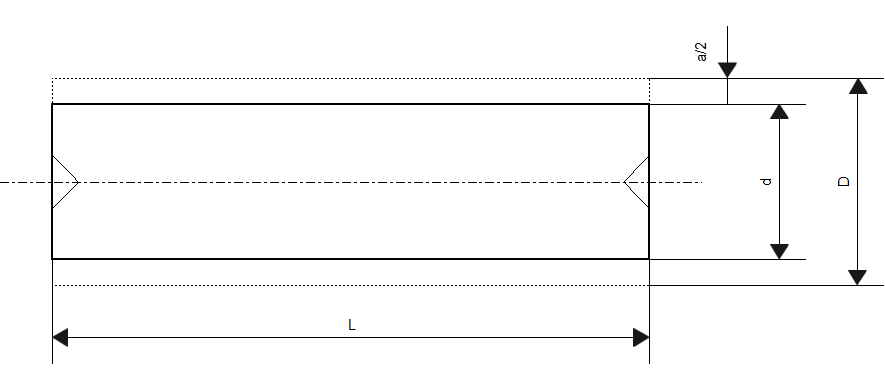

- D (Initial diameter) = 60 mm
- d (Final diameter) = 59.7 mm
- a (Depth of cut) = 0.3 mm
- L (Grinding length) = 192 mm

The parameter to be tested is the **cutting speed (m/min)**. Cutting speed is the value required to determine the speed of cutting on the workpiece. Based on the reference from Machinery's Handbook 29th Edition - Industrial Press in 2012 that the recommended cutting speed for the material we have is 21 m/min. So that the combination of cutting speed quantities that we test is:

- 17 m/min
- 19 m/min
- 21 m/min

While for the feed rate, the feed rate is used at 1100 mm/min

In [1]:
# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Load Data

data = pd.read_excel('Data.xlsx')
data

,Sample,a,Vc,F,Ra
0,1,0.3,17,1100,2.7
1,2,0.3,17,1100,2.6
2,3,0.3,17,1100,2.4
3,4,0.3,19,1100,3.5
4,5,0.3,19,1100,3.4
5,6,0.3,19,1100,2.7
6,7,0.3,21,1100,3.5
7,8,0.3,21,1100,3.3
8,9,0.3,21,1100,4.0


- a = Depth of Cut (mm)
- Vc = Cutting Speed (m/min)
- F = Feed Rate (mm/min)
- Ra = Surface Roughness (µm)

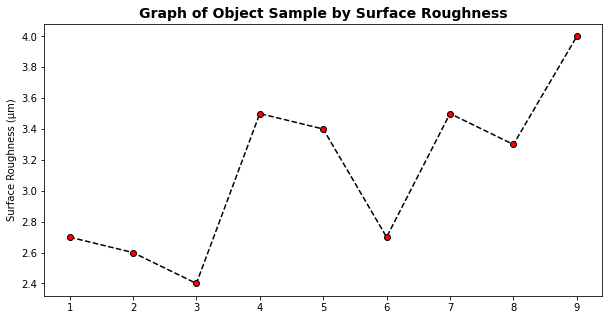

In [3]:
plt.figure(figsize=(10,5))
plt.plot(data['Sample'], data['Ra'], color='black', marker='o', linestyle= '--', markerfacecolor='red')
plt.title('Graph of Object Sample by Surface Roughness',size=14, fontweight='bold')
plt.ylabel('Surface Roughness (µm)')
plt.show()

Total samples to be tested are 9 pieces with 3 samples each for one cutting speed value with the surface roughness result for each sample. Based on the results of checking the surface roughness of all samples, cutting speed tends to have a directly proportional value to the surface roughness results even though the results are still quite varied for each sample.

## Hypothesis Testing

Question: Is the **cutting speed** value affecting the **surface roughness** of the object?

- **H0** = Cutting speed has the same surface roughness (**The cutting speed value does not affect the surface roughness value**)
- **H1** = Cutting speed has a significantly different surface roughness (**The cutting speed value affects the surface roughness value**)

We will determine which hypothesis to take based on the **P-value** (the observed probability of the test statistic) whether it is greater than the **alpha** value (the maximum error determined by the researcher) or not (Most of the references specify that the alpha value is **0.05** or **5%**).

In [4]:
# Sorting based on cutting speed values

Vc_17 = data[data['Vc'] == 17]
Vc_19 = data[data['Vc'] == 19]
Vc_21 = data[data['Vc'] == 21]

In [7]:
# ANOVA test

anova_test = st.f_oneway(Vc_17['Ra'], 
                         Vc_19['Ra'], 
                         Vc_21['Ra'])

p_value = round(anova_test.pvalue,2)

print('p_value is', p_value)
print(' ')
if p_value > 0.05:
    print('The cutting speed value does not affect the surface roughness value')
else:
    print('The cutting speed value affects the surface roughness value')

p_value is 0.03
 
The cutting speed value affects the surface roughness value


Based on the results of the P-value, we accept the **alternate hypothesis (H1)**. Then for final conclusion, we can check average cutting speed based on surface roughness value.

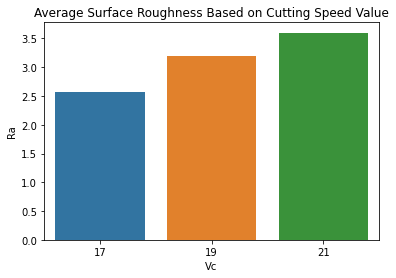

In [6]:
# Final conclusion based on average surface roughness in each cutting speed value

bo_mean = data.groupby(['Vc']).mean().reset_index()
bar_mean = sns.barplot(x=bo_mean['Vc'],y=bo_mean['Ra'])
bar_mean.set(title = "Average Surface Roughness Based on Cutting Speed Value")
plt.show(bar_mean)

We get the final conclusion. Based on ANOVA test, we accept the H1 that **cutting speed value has a great effect on the surface roughness of the cylindrical grinding process**, with the **higher cutting speed value used, the greater the average surface roughness of the resulting product**.

## Conclusion

**ANOVA (Analysis of Variance)** is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA examines the ratio of variance between groups and the variance within groups to determine whether the ratio is big enough to be statistically significant. The use of the ANOVA method for experiments in manufacturing can be used as a strong basis for making improvements in products and processes.